# Aula 10 - Exercício 09
## Random Forest Classifier
### Alunos:
 - Bruno Gomes Coelho       - 9791160
 - Bruno Mendes da Costa - 9779433

---
### Dataset:
 O dataset utilizado nesse exercício será o SpamBase. Essa base contém 57 atributos numéricos e 1 atributo representando a classe.
 
### Considerações:
Utilize, para todas as funções que aceitarem o parâmetro, `random_state=0`.

--- 
### Questão 01.
Carregue o arquivo `spambase.data`, separe os dados da classe e crie conjuntos de treino (90%) e teste (10%) estratificados.

In [0]:
!wget "https://raw.githubusercontent.com/BrunoxD/machineLearning/master/aula10/spambase.data" -qO spambase.data

In [0]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split


df = pd.read_csv("spambase.data", header=None)

In [41]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [0]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.1, random_state=0, stratify=df.iloc[:,-1])

---
### Questão 02.
Dado os conjuntos de treino e teste calculados anteriormente, calcule a acurácia do classificador Decision Tree.

In [43]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree = decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.8937093275488069

---
### Questão 03.
Agora calcule a acurácia do classificador Random Forest Classifier, com `n_estimators=2`.


In [44]:
random_forest = RandomForestClassifier(n_estimators=2, random_state=0)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.9002169197396963

---
### Questão 04.
Agora estime, empiricamente, um valor adequado para `n_estimators`. Para isso, realize as seguintes etapas:
- Utilize o intervalo $[1,100]$ para testar possíveis valores de `n_estimators`
- Salve os valores da acurácia para cada valor testado e plote um gráfico de linha com os valores
- Reporte o maior valor de acurácia bem como o `n_estimators` que o gerou

<br>
<br>

---


Para encontrar os melhores hiperparâmetros optamos por utilizar um grid search de 2 folds. Para não enviezar nosso modelo quanto ao conjunto de teste, utilizamos os folds apenas sobre o treino já especificado acima. Dessa forma, quando testado sobre o teste, garantimos que os modelos nunca viram esses dados.

In [0]:

def search_best_parameter(name, max_value, params={}):  
    search_space = {name: [x for x in range(1, max_value)]}

    grid_search = GridSearchCV(RandomForestClassifier(**params), search_space, cv=2)
    grid_search.fit(X_train, y_train)
    
    results = pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Acuracia"])
    results[name] = search_space[name]
    
    # Print and plot
    print("O melhor estimador foi:", grid_search.best_params_, "Com acurácia de", grid_search.best_score_)
    sns.lineplot(x=results[name], y=results["Acuracia"])
    plt.show()

    return results, grid_search.best_params_[name]


O melhor estimador foi: {'n_estimators': 65} Com acurácia de 0.946376811594203


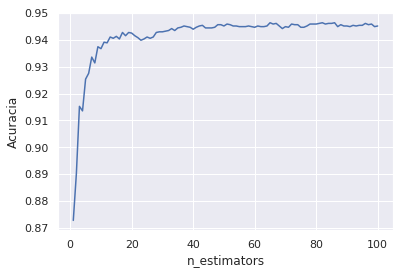

CPU times: user 43.5 s, sys: 196 ms, total: 43.7 s
Wall time: 43.6 s


In [46]:
%%time
params = {"random_state": 0}
_, best_n_estimator = search_best_parameter("n_estimators", 101, params=params)

---
### Questão 05.
Agora estime empiricamente um valor adequado para `max_features`. Utilize a mesma metodologia da questão anterior, porém com `n_estimators` já definido. Utilize o intervalo $[1, n\_features]$ para busca de `max_features`, onde $n\_features$ é a dimensão dos dados do conjunto.

O melhor estimador foi: {'max_features': 3} Com acurácia de 0.946376811594203


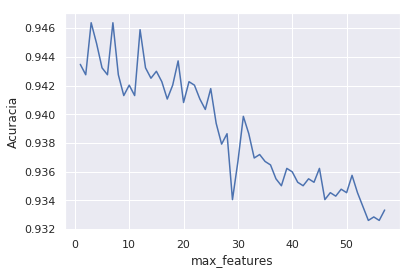

CPU times: user 1min 37s, sys: 175 ms, total: 1min 38s
Wall time: 1min 37s


In [47]:
%%time
params = {"n_estimators": best_n_estimator, 
          "random_state": 0}
_, best_max_features = search_best_parameter("max_features", X_train.shape[1]+1, 
                                             params=params)

---
### Questão 06.
Agora estime empiricamente um valor adequado para `max_depth `. Utilize a mesma metodologia da questão 4 e 5,  porém com `n_estimators` e `max_features` já definidos. Utilize o intervalo $[1, 100]$ para busca de `max_depth`.


O melhor estimador foi: {'max_depth': 46} Com acurácia de 0.9466183574879227


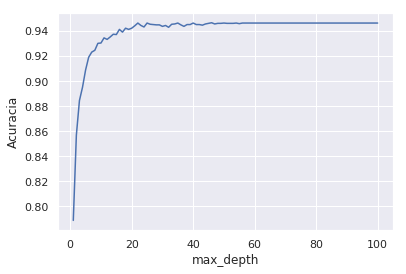

CPU times: user 38.1 s, sys: 196 ms, total: 38.3 s
Wall time: 38.1 s


In [48]:
%%time
params = {"n_estimators": best_n_estimator,
          "random_state": 0,
         "max_features": best_max_features}

_, best_max_depth = search_best_parameter("max_depth", 101, params=params)

---
### Questão 07.
Repita o que foi pedido na questão 3, só que agora utilize os parâmetros encontrados nas questões 4 e 5. Comente o resultado.

In [49]:
random_forest = RandomForestClassifier(n_estimators=best_n_estimator,
                                       max_depth=best_max_depth,
                                       max_features=best_max_features,
                                       random_state=0)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.96529284164859

Como pode ser observado, incialmente o Random Forerest já apresentava uma acurácia melhor que o DecisionTree, mas com uma diferença de menos de 1%.

Quando os melhores hiperparâmetros para o nosso problema são encontrados, aumentamos a acurácia do Random Forest para 97%, um aumento significativo sobre os dois modelos iniciais que tiveram acurácia de 89% (Decision Tree) e 90% (Random Forest padrão).

Assim, pode ser observado a importância de conhecer e saber como otimizar os hiperparâmetros de cada modelo para o seu determinado problema.



<br>
<br>

---
